In [16]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

"""
Carregando os dados de um diretório desejado.
C:\1.Portfolio\Machine_Learning_DSA_Projects\Projeto_1_Santander_Customers\data\01_raw
"""

path = input('Por favor adicione o diretório de trabalho?')
for dirname, _, filename in os.walk(path, topdown = True):
    for filename in filename:
        if filename == 'test.csv':
                teste = pd.read_csv(os.path.join(dirname,filename))
        else:
            if filename == 'train.csv':
                treino = pd.read_csv(os.path.join(dirname,filename))
            else:
                print("Carregamento não foi possível")
   
"""
Realizando o split entre variáveis independentes e dependentes.
"""
X = treino.drop('TARGET',axis=1) 
y= treino.TARGET

Por favor adicione o diretório de trabalho? C:\1.Portfolio\Machine_Learning_DSA_Projects\Projeto_1_Santander_Customers\data\01_raw


In [17]:
"""
Checando se os dados de teste foram carregados!!!
"""
teste.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [18]:
"""
Checando se os dados de treino foram carregados!!!
"""
treino.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [19]:
""" Checando por valores missing - Não temos valores missing """

print(treino.isnull().values.any())
print(treino.isnull().sum().sum())

False
0


As classes do dataset são: [0 1]




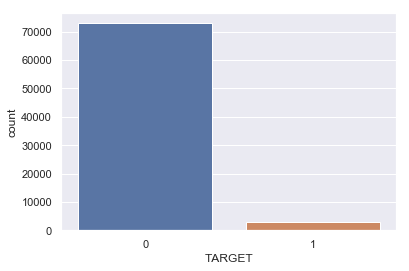

In [20]:
"""Checando a porpocinalidade da variável target
   Precisaremos balancear o nosso dataset, pois temos muitos exemplos da classe 0. """

vals = treino['TARGET'].unique()
print(f'As classes do dataset são: {vals}')
print('\n')
sns.set(style = 'darkgrid')
f, (ax) = plt.subplots(figsize=(6, 4))
sns.countplot(x='TARGET', data = treino, ax= ax)